<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch03_LambdaSchichten/blob/main/LambdaAusdruecke03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda Schichten 03


In [8]:
from keras.layers import Input, Lambda
from keras.models import Model
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

!git clone https://github.com/MaschinenNah/ml_utils
from ml_utils import load
from ml_utils import convert
from ml_utils import show
from ml_utils import frame_predict as fp

# Hier kommen einige unwichtige und störende Warnungen, deshalb:
import warnings
warnings.filterwarnings('ignore')

# Weil Modelle immer Batches verarbeiten, 
# wir uns aber erst einmal einzelne Beispiele anschauen wollen:
def predict_single(model, input):
  input = input[np.newaxis, ...]
  output = model.predict(input)[0]
  return output

fatal: destination path 'ml_utils' already exists and is not an empty directory.


In [3]:
zip_url = "https://github.com/MaschinenNah/demo_daten/raw/main/farbige_bilder_48_48.zip"
load.load_and_unzip_from_url(zip_url)

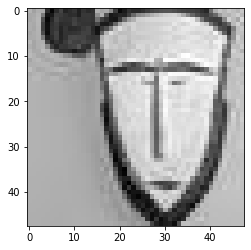

In [16]:
path = "/content/data/img_train/1110321_1.jpg"
img = load.img_path_to_np_array(path)
img = convert.rgb_to_grayscale(img)
plt.imshow(img, cmap='gray')

In [17]:
input_layer = Input((48, 48))
output_layer = Lambda(lambda n : tf.where(n < 0.5, 0, 1))(input_layer)
model = Model(input_layer, output_layer)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 48, 48)]          0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 48, 48)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


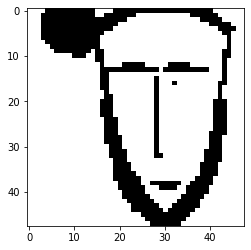

In [18]:
img_new = predict_single(model, img)
plt.imshow(img_new, cmap='gray')